In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, fixed
import pandas as pd
from random import choice
from helpers.mappers import acaps_country_name_mapper, acaps_measure_mapper
from helpers.utils import generate_dates
from helpers.data_extractors import extract_oxford_measure_data,merge_country_dfs
from helpers.data_extractors import calculate_transmission_data, create_measure_success_tuple
from matplotlib import pyplot as plt

from datetime import timedelta
from collections import defaultdict
import seaborn as sns
from helpers.visualisation import visualise_measures_for_country, visualise_measure_ranking, visualise_effect_restriction_relation,visualize_country_forecast,create_toggle_buttons

sns.set()
sns.set_context('poster')

In [3]:
country_dfs = extract_oxford_measure_data()

In [4]:
def f(x):
    visualise_measures_for_country(country_dfs, x)

dropdown = widgets.Dropdown(
    options=sorted(country_dfs.keys()),
    value='Germany',
    description='Country:')
interact(f, x=dropdown);


interactive(children=(Dropdown(description='Country:', index=7, options=('Austria', 'Belgium', 'Canada', 'Chin…

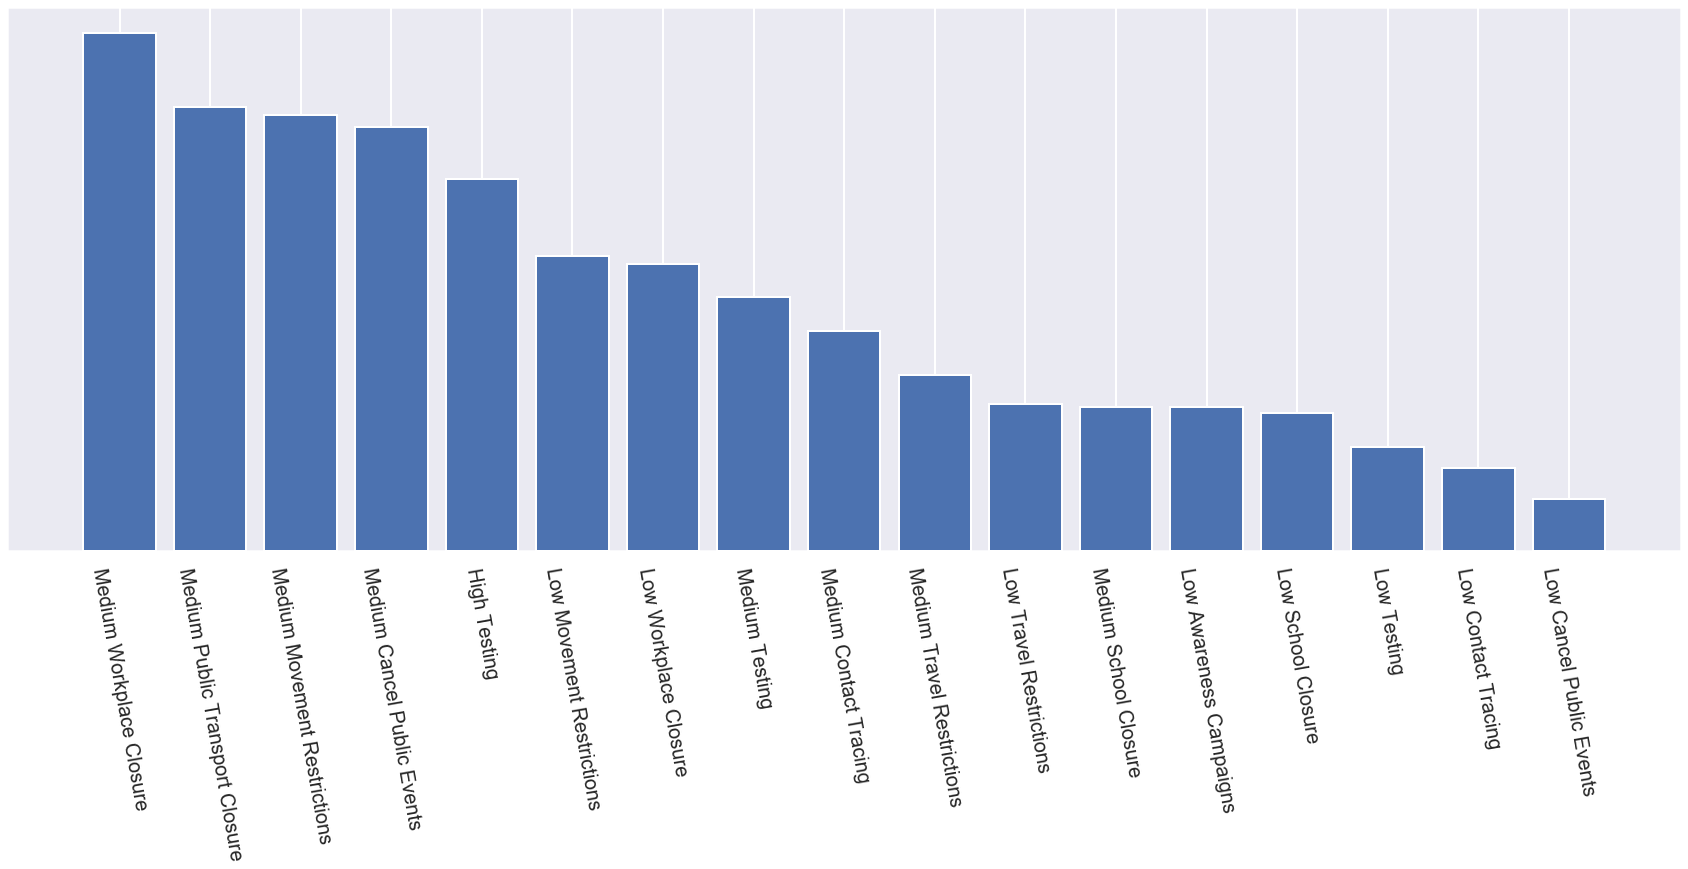

In [5]:
visualise_measure_ranking(country_dfs)
plt.yticks([]);

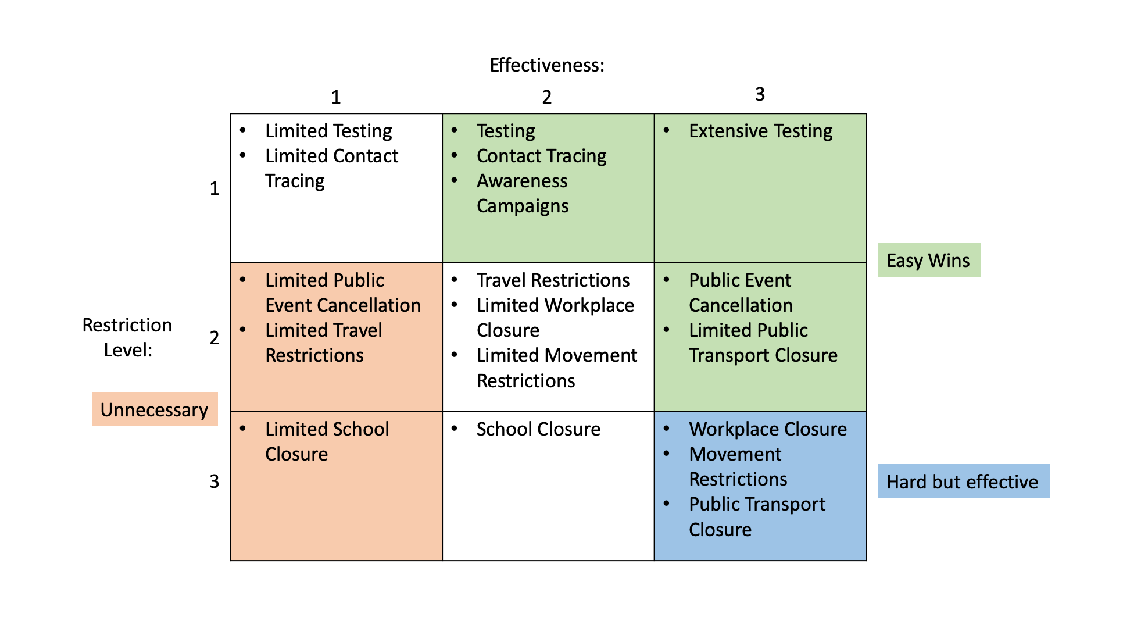

In [6]:
plt.rcParams["axes.grid"] = False
visualise_effect_restriction_relation()
plt.axis('off');

In [7]:
plt.rcParams["axes.grid"] = True

In [8]:
interact_manual = interact.options(manual=True, manual_name="Calculate")

In [11]:
global toggle_buttons
def f(x):
    global toggle_buttons
    country_name = x.value
    active_measures = []
    for toggle_button in toggle_buttons:
        if toggle_button.value:
            active_measures.append(toggle_button.description)
    visualize_country_forecast(country_dfs, country_name, active_measures)
    
def create_buttons(x):
    global toggle_buttons
    toggle_buttons = create_toggle_buttons(country_dfs,x)
    
dropdown = widgets.Dropdown(
    options=sorted(country_dfs.keys()),
    value='Germany',
    description='Country:');

interact(create_buttons, x=dropdown);
interact_manual(f,x=fixed(dropdown));
plt.show()


interactive(children=(Dropdown(description='Country:', index=7, options=('Austria', 'Belgium', 'Canada', 'Chin…

interactive(children=(Button(description='Calculate', style=ButtonStyle()), Output()), _dom_classes=('widget-i…